# Kaggle

In [1]:
import pandas as pd
import numpy as np

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small

 96% 543M/565M [00:04<00:00, 163MB/s]
100% 565M/565M [00:04<00:00, 132MB/s]


In [4]:
!unzip fashion-product-images-small.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: myntradataset/images/58131.jpg  
  inflating: myntradataset/images/58132.jpg  
  inflating: myntradataset/images/58133.jpg  
  inflating: myntradataset/images/58135.jpg  
  inflating: myntradataset/images/58136.jpg  
  inflating: myntradataset/images/58137.jpg  
  inflating: myntradataset/images/58138.jpg  
  inflating: myntradataset/images/58139.jpg  
  inflating: myntradataset/images/5814.jpg  
  inflating: myntradataset/images/58140.jpg  
  inflating: myntradataset/images/58141.jpg  
  inflating: myntradataset/images/58143.jpg  
  inflating: myntradataset/images/58144.jpg  
  inflating: myntradataset/images/58145.jpg  
  inflating: myntradataset/images/58146.jpg  
  inflating: myntradataset/images/58147.jpg  
  inflating: myntradataset/images/58148.jpg  
  inflating: myntradataset/images/58149.jpg  
  inflating: myntradataset/images/5815.jpg  
  inflating: myntradataset/images/58150.jpg  
  inflating: myntradataset/images/58151.jpg  


In [5]:
df = pd.read_csv('/content/styles.csv',error_bad_lines=False)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 1

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [6]:
df = df.dropna()
df.columns

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')

In [7]:
df.subCategory.unique()

array(['Topwear', 'Bottomwear', 'Watches', 'Socks', 'Shoes', 'Belts',
       'Flip Flops', 'Bags', 'Innerwear', 'Sandal', 'Shoe Accessories',
       'Fragrance', 'Jewellery', 'Lips', 'Saree', 'Eyewear', 'Scarves',
       'Dress', 'Loungewear and Nightwear', 'Wallets', 'Apparel Set',
       'Headwear', 'Mufflers', 'Skin Care', 'Makeup', 'Free Gifts',
       'Ties', 'Accessories', 'Nails', 'Beauty Accessories',
       'Water Bottle', 'Skin', 'Eyes', 'Bath and Body', 'Gloves',
       'Sports Accessories', 'Cufflinks', 'Sports Equipment', 'Stoles',
       'Hair', 'Perfumes', 'Home Furnishing', 'Umbrellas', 'Wristbands',
       'Vouchers'], dtype=object)

# Topwear, Bottomwear -> Train, Test

In [8]:
import os
import shutil

#shutil.rmtree('/content/topwear')
#shutil.rmtree('/content/bottomwear')

os.makedirs('/content/train/top')
os.makedirs('/content/train/bottom')
os.makedirs('/content/test/top')
os.makedirs('/content/test/bottom')

In [9]:
top_id = df[df['subCategory']=='Topwear'].id.values
top_id

array([15970, 53759,  1855, ..., 12544, 42234, 18842])

In [10]:
top_cnt = df[df['subCategory']=='Topwear'].id.values.shape[0]
top_cnt

15387

In [11]:
bot_id = df[df['subCategory']=='Bottomwear'].id.values
bot_id

array([39386, 21379, 18005, ..., 23455, 10445, 10021])

In [12]:
bot_cnt = df[df['subCategory']=='Bottomwear'].id.values.shape[0]
bot_cnt

2686

In [13]:
cnt = 0
for i in top_id:
  src = '/content/images/'+str(i)+'.jpg'
  cnt += 1
  if cnt <= top_cnt*0.75:
    dst = '/content/train/top'
  else:
    dst = '/content/test/top'

  try:
    shutil.copy(src, dst)
  except:
    pass

In [14]:
cnt = 0
for i in bot_id:
  src = '/content/images/'+str(i)+'.jpg'
  cnt += 1
  if cnt <= bot_cnt*0.75:
    dst = '/content/train/bottom'
  else:
    dst = '/content/test/bottom'

  try:
    shutil.copy(src, dst)
  except:
    pass

In [15]:
print(len(os.listdir('/content/train/top')))
print(len(os.listdir('/content/test/top')))
print(len(os.listdir('/content/train/bottom')))
print(len(os.listdir('/content/test/bottom')))

11538
3845
2013
672


# 이미지 시각화 확인 작업

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import cv2
import glob
%matplotlib inline

In [17]:
top_img = glob.glob('/content/train/top/*')
top_img

['/content/train/top/29145.jpg',
 '/content/train/top/38615.jpg',
 '/content/train/top/19727.jpg',
 '/content/train/top/22598.jpg',
 '/content/train/top/18509.jpg',
 '/content/train/top/26474.jpg',
 '/content/train/top/23178.jpg',
 '/content/train/top/8348.jpg',
 '/content/train/top/8585.jpg',
 '/content/train/top/3126.jpg',
 '/content/train/top/4058.jpg',
 '/content/train/top/12606.jpg',
 '/content/train/top/9449.jpg',
 '/content/train/top/9981.jpg',
 '/content/train/top/14314.jpg',
 '/content/train/top/59920.jpg',
 '/content/train/top/16815.jpg',
 '/content/train/top/33585.jpg',
 '/content/train/top/22576.jpg',
 '/content/train/top/10372.jpg',
 '/content/train/top/3933.jpg',
 '/content/train/top/12273.jpg',
 '/content/train/top/35048.jpg',
 '/content/train/top/30938.jpg',
 '/content/train/top/3686.jpg',
 '/content/train/top/18848.jpg',
 '/content/train/top/40592.jpg',
 '/content/train/top/2300.jpg',
 '/content/train/top/17546.jpg',
 '/content/train/top/16533.jpg',
 '/content/train/to

In [18]:
bot_img = glob.glob('/content/train/bottom/*')

In [19]:
# cv2를 이용해 이미지를 읽는 함수 정의
def read_img(file_path):
    img_arr = cv2.imread(file_path)
    return cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB) # cvtColor로 BGR을 RGB로 바꿔줌

In [20]:
# 각 이미지 폴더에서 3개씩 랜덤으로 이미지 시각화 하기

# 이미지 array 준비
import random
img_arrs = []
img_num = range(0,300)

for i in random.sample(img_num,2):
    
    img_arrs.append(read_img(top_img[i]))
    img_arrs.append(read_img(bot_img[i]))


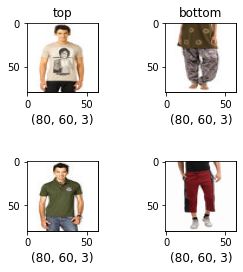

In [21]:
rows = 2 # 3개씩 샘플링 했으므로
columns = 2

# 그림판 설정
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*2, rows*2))

# 각 판에 이미지 출력
for num in range(1, rows*columns+1): # 1번 부터 9번 까지
    
    fig.add_subplot(rows, columns, num) # 원하는 위치 번호(num)를 입력
    idx = num - 1 # 인덱스
    
    plt.imshow(img_arrs[idx], aspect='auto')
    plt.xlabel(f'{img_arrs[idx].shape}', fontsize=12)

fig.tight_layout() # 이미지 사이 간격 조정



# 제목 설정
cols = ['top', 'bottom']

for folder_idx, ax in enumerate(axes[0]):
    ax.set_title(cols[folder_idx])

# xtick, ytick 제거
for idx, ax in enumerate(axes.flat):
    ax.set_xticks([])
    ax.set_yticks([])

# DataLoader 정의

In [22]:
import torch
import torchvision
from torchvision import transforms # 이미지 데이터 transform
from torch.utils.data import DataLoader # 이미지 데이터 로더

In [23]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [24]:
# 경로 지정

train_path = '/content/train/'
test_path = '/content/test'

## Reshape

In [25]:
resize_trans = transforms.Compose([
                                   transforms.Resize((224,224)),
                                   transforms.ToTensor()
])

resize_train = torchvision.datasets.ImageFolder(root=train_path, transform=resize_trans)
resize_test = torchvision.datasets.ImageFolder(root=test_path, transform=resize_trans)

In [26]:
resize_train[0][0].shape # ToTensor를 진행했기 때문에 데이터가 torch(C,H,W) 형태로 바뀜

torch.Size([3, 224, 224])

## Normalize

In [27]:
def get_mean_std(dataset):
  meanRGB = [np.mean(image.numpy(), axis=(1,2)) for image,_ in dataset]
  stdRGB = [np.std(image.numpy(), axis=(1,2)) for image,_ in dataset]

  meanR = np.mean([m[0] for m in meanRGB])
  meanG = np.mean([m[1] for m in meanRGB])
  meanB = np.mean([m[2] for m in meanRGB])

  stdR = np.mean([s[0] for s in stdRGB])
  stdG = np.mean([s[1] for s in stdRGB])
  stdB = np.mean([s[2] for s in stdRGB])

  print(meanR, meanG, meanB)
  print(stdR, stdG, stdB)

In [28]:
get_mean_std(resize_train)

0.82407635 0.8013382 0.79451895
0.25283885 0.26594353 0.26951617


In [29]:
get_mean_std(resize_test)

0.8237317 0.8022987 0.79481965
0.25190422 0.2644349 0.26853362


In [30]:
# normalization 준비

resize_train_mean=[0.82407635, 0.8013382, 0.79451895]
resize_train_std=[0.25283885, 0.26594353, 0.26951617]

resize_test_mean=[0.8237317, 0.8022987, 0.79481965]
resize_test_std=[0.25190422, 0.2644349, 0.26853362]

## Image Augmentation

In [31]:
transform_train = transforms.Compose([
    transforms.Resize((224, 224)), # 이미지 resize
    #transforms.RandomCrop(128), # 이미지를 랜덤으로 크롭
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2), # 이미지 지터링(밝기, 대조, 채비, 색조)
    transforms.RandomHorizontalFlip(p = 0.5), # p확률로 이미지 좌우반전
    transforms.RandomVerticalFlip(p = 0.5), # p확률로 상하반전
    transforms.ToTensor(),
    transforms.Normalize(resize_train_mean, resize_train_std)
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Normalize(resize_test_mean, resize_test_std)
])

trainset = torchvision.datasets.ImageFolder(root=train_path, transform=transform_train)
testset = torchvision.datasets.ImageFolder(root=test_path, transform=transform_test)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=0)

test_loader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=0)

## 이미지 확인

In [32]:
def imshow(img, mean, std):
    npimg = img.numpy()
    img = np.transpose( npimg, (1, 2, 0) )
    img = img * std + mean # renormalize
    img = img.clip(0, 1)
    plt.imshow(img)
    plt.show()


none_trans = torchvision.datasets.ImageFolder(root=train_path, transform=None)

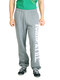

In [33]:
# 원본 이미지
none_trans[359][0]

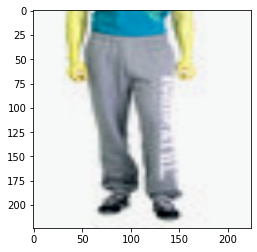

In [34]:
# augmentation을 적용한 shark 이미지
imshow((trainset[359][0]),resize_train_mean,resize_train_std)

# ResNet18
- 참고: https://better-tomorrow.tistory.com/entry/TorchVision-model-funetuning

In [35]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [36]:
# Models to choose from [resnet, alexnet, vgg, squeezenet, densenet, inception]
model_name = "resnet18"

# Number of classes in the dataset
num_classes = 2

# Batch size for training (change depending on how much memory you have)
batch_size = 64

# Number of epochs to train for
num_epochs = 3

# Flag for feature extracting. When False, we finetune the whole model,
# when True we only update the reshaped layer params
feature_extract = True

In [37]:
image_datasets = {'train': trainset, 'val': testset}
dataloaders = {'train': train_loader, 'val': test_loader}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
class_names

['bottom', 'top']

## Code for Training + Validation with given model

In [38]:
# train_model(model_ft, dataloaders, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=(model_name=="inception"))

In [39]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, is_inception=False):
    since = time.time()

    val_acc_history = []

    # state_dict : 기존 학습 매개변수 저장
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.
                    if is_inception and phase == 'train':
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

## requires_grad False로
- Feature extract 할 때 .requires_grad 파라미터를 False로 설정합니다.
- 반면, training from scratch나 fine-tuning을 할 때는 .requires_grad를 True로 설정합니다.

In [40]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

## Initialize for Reshaping
- 본인의 dataset의 class 수와 동일한 수의 출력을 가지도록 변경
- Feature extraction 시, 마지막 레이어의 parameter만 업데이트하거나, reshaping하는 레이어의 parameter만 업데이트 합니다. 따라서 변경하지 않으려는 레이어에 대해 gradient를 계산할 필요가 없으므로, 효율성을 위해 .required_grads 속성을 False로 설정합니다. 새 레이어를 초기화하고 기본적으로 새 parameter에 .requires_grad=True가 있으므로, 새 레이어의 파라미터만 업데이트 됩니다.
- Fine-tuning 할 때 모든 .required_grad를 기본값 True로 설정한 상태로 둘 수 있습니다.

In [41]:
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = None
    input_size = 0

    if model_name == "resnet18":
        model_ft = models.resnet18(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    else:
        print("Invalid model name, exiting...")
        exit()

    return model_ft, input_size

In [42]:
# Initialize the model for this run
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Print the model we just instantiated
print(model_ft)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

- requires.grad 확인

In [43]:
for name, param in model_ft.named_parameters():
    print('name: ', name)
    print(type(param))
    print('param.shape: ', param.shape)
    print('param.requires_grad: ', param.requires_grad)
    print('=====')

name:  conv1.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([64, 3, 7, 7])
param.requires_grad:  False
=====
name:  bn1.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([64])
param.requires_grad:  False
=====
name:  bn1.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([64])
param.requires_grad:  False
=====
name:  layer1.0.conv1.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([64, 64, 3, 3])
param.requires_grad:  False
=====
name:  layer1.0.bn1.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([64])
param.requires_grad:  False
=====
name:  layer1.0.bn1.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([64])
param.requires_grad:  False
=====
name:  layer1.0.conv2.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([64, 64, 3, 3])
param.requires_grad:  False
=====
name:  layer1.0.bn2.weight
<class 'torch.nn.parameter.Parameter'>
param.shape: 

## 매개변수 옮길 fc layer 제외 resnet 18 만들기

In [44]:
import torchvision.models.resnet as resnet
import torch.nn as nn
import torch.optim as optim

# 미리 정의
conv1x1=resnet.conv1x1
Bottleneck = resnet.Bottleneck
BasicBlock= resnet.BasicBlock

In [45]:
class ResNet_without_fc(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=True):
        super(ResNet_without_fc, self).__init__()
        self.inplanes = 64

        # inputs = 3x224x224 -> 3x128x128로 바뀜
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3, bias=False) # 마찬가지로 전부 사이즈 조정
        self.bn1 = nn.BatchNorm2d(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        self.layer1 = self._make_layer(block, 64, layers[0]) # 3 반복
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2) # 4 반복
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2) # 6 반복
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2) # 3 반복
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1): # planes -> 입력되는 채널 수
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion: 
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        # input [32, 128, 128] -> [C ,H, W]
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        #x.shape =[32, 64, 64]

        x = self.layer1(x)
        #x.shape =[128, 64, 64]
        x = self.layer2(x)
        #x.shape =[256, 32, 32]
        x = self.layer3(x)
        #x.shape =[512, 16, 16]
        x = self.layer4(x)
        #x.shape =[1024, 8, 8]
        
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)

        return x

In [46]:
resnet_wo_fc = ResNet_without_fc(resnet.BasicBlock, [2, 2, 2, 2], 2, True).to(device)

In [47]:
resnet_wo_fc

ResNet_without_fc(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inpla

In [48]:
set_parameter_requires_grad(resnet_wo_fc, feature_extracting=True)

In [49]:
for name, param in resnet_wo_fc.named_parameters():
    print('name: ', name)
    print(type(param))
    print('param.shape: ', param.shape)
    print('param.requires_grad: ', param.requires_grad)
    print('=====')

name:  conv1.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([64, 3, 7, 7])
param.requires_grad:  False
=====
name:  bn1.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([64])
param.requires_grad:  False
=====
name:  bn1.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([64])
param.requires_grad:  False
=====
name:  layer1.0.conv1.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([64, 64, 3, 3])
param.requires_grad:  False
=====
name:  layer1.0.bn1.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([64])
param.requires_grad:  False
=====
name:  layer1.0.bn1.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([64])
param.requires_grad:  False
=====
name:  layer1.0.conv2.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([64, 64, 3, 3])
param.requires_grad:  False
=====
name:  layer1.0.bn2.weight
<class 'torch.nn.parameter.Parameter'>
param.shape: 

## Create the Optimizer
- 원하는 파라미터만 업데이트하는 optimizer을 만드는 것입니다.

In [50]:
# Send the model to GPU
model_ft = model_ft.to(device)

# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = [] # 파라미터 리스트 생성
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9) # 업데이트 할 파라미터만 넣어준다.

Params to learn:
	 fc.weight
	 fc.bias


## Run Training and Validation Step
- 기본 learning rate는 모든 모델에 대해 최적이 아니므로 최대 정확도를 얻으려면 각 모델에 대해 개별적으로 조정해야합니다.

In [51]:
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=(model_name=="inception"))

Epoch 0/2
----------
train Loss: 0.2326 Acc: 0.9128
val Loss: 0.1125 Acc: 0.9681

Epoch 1/2
----------
train Loss: 0.1221 Acc: 0.9613
val Loss: 0.0932 Acc: 0.9668

Epoch 2/2
----------
train Loss: 0.1039 Acc: 0.9679
val Loss: 0.0757 Acc: 0.9781

Training complete in 6m 33s
Best val Acc: 0.978083


## 매개변수 옮기기

In [52]:
# 매개변수 파일 저장&로드
torch.save(model_ft.state_dict(), 'all_param.pt')
pretrained_dict = torch.load('all_param.pt')

model_dict = resnet_wo_fc.state_dict() # 현재 신경망 상태 로드

In [53]:
# 1. filter out unnecessary keys (fc 부분 제거해서 저장)
pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}

In [54]:
# 2. overwrite entries in the existing state dict
model_dict.update(pretrained_dict) 

# 3. load the new state dict
resnet_wo_fc.load_state_dict(pretrained_dict)

<All keys matched successfully>

## 예측값 이미지와 avgpool layer feature 확인

In [55]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.82407635, 0.8013382, 0.79451895])
    std = np.array([0.25283885, 0.26594353, 0.26951617])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # 갱신이 될 때까지 잠시 기다립니다.

In [59]:
def visualize_and_feature_model(num_images=6):
  images_so_far = 0

  model_ft.eval()
  resnet_wo_fc.eval()
  with torch.no_grad():
    for image,label in dataloaders['val']:
      x=image.to(device)
      y_=label.to(device)
      output=model_ft.forward(x)
      output_feature=resnet_wo_fc.forward(x)

      # https://pytorch.org/docs/stable/torch.html?highlight=max#torch.max
      _,output_index=torch.max(output,1)  #max함수는 max value와 max value의 index를 도출합니다. 두 번째 인자 1은 결과의 dimension을 의미합니다. 
      # dim = 1이면, 행을 기준(각 행마다)으로 최댓값과 인덱스를 동시에 출력

      for j in range(x.size()[0]):
          images_so_far += 1
          ax = plt.subplot(num_images//2, 2, images_so_far)
          ax.axis('off')
          ax.set_title('predicted: {}\nfeature: {}'.format(class_names[output_index[j]], output_feature[j][:5].cpu().numpy()))
          ('predicte: {}'.format(class_names[output_index[j]]))
          imshow(x.cpu().data[j])

          if images_so_far == num_images:
              return

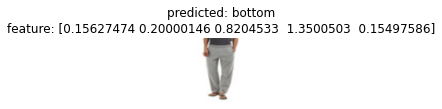

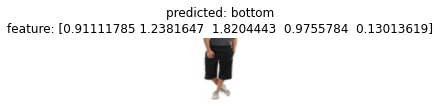

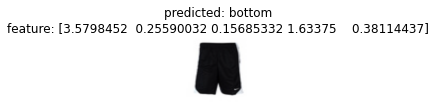

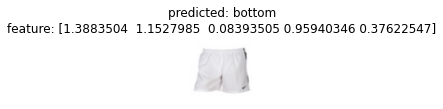

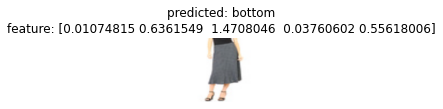

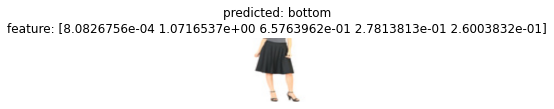

In [60]:
visualize_and_feature_model(6)

## 모델 저장

In [58]:
torch.save(resnet_wo_fc, 'no_fc_model.pt')  # 전체 모델 저장
torch.save(resnet_wo_fc.state_dict(), 'no_fc_model_state_dict.pt') # 모델 객체의 state_dict 저장

In [66]:
N, K = 224, 224

x = torch.rand(N, K) # [M, N, K]
y = torch.rand(N, K) # [M, N, K]

x=torch.unsqueeze(x,0)
y=torch.unsqueeze(y,0)

output1 = torch.cat([x,y], dim=0) #[M, N+N, K]

print(x)
print(y)
print(output1)

tensor([[[0.8507, 0.3444, 0.1422,  ..., 0.5202, 0.8855, 0.5841],
         [0.2250, 0.4066, 0.4476,  ..., 0.2111, 0.7797, 0.6996],
         [0.2780, 0.9993, 0.9590,  ..., 0.7019, 0.5508, 0.5174],
         ...,
         [0.3050, 0.2929, 0.1996,  ..., 0.4671, 0.5662, 0.4274],
         [0.1569, 0.5886, 0.0012,  ..., 0.2960, 0.1153, 0.3418],
         [0.4794, 0.7024, 0.4969,  ..., 0.9517, 0.0053, 0.8543]]])
tensor([[[0.9077, 0.7951, 0.8755,  ..., 0.8583, 0.3458, 0.9564],
         [0.1591, 0.9692, 0.7944,  ..., 0.3196, 0.9773, 0.7360],
         [0.2798, 0.0778, 0.0734,  ..., 0.0500, 0.9358, 0.9345],
         ...,
         [0.8831, 0.7844, 0.6372,  ..., 0.6153, 0.1251, 0.5466],
         [0.6964, 0.5884, 0.9360,  ..., 0.5634, 0.2731, 0.9399],
         [0.4995, 0.1400, 0.5510,  ..., 0.7812, 0.3029, 0.3720]]])
tensor([[[0.8507, 0.3444, 0.1422,  ..., 0.5202, 0.8855, 0.5841],
         [0.2250, 0.4066, 0.4476,  ..., 0.2111, 0.7797, 0.6996],
         [0.2780, 0.9993, 0.9590,  ..., 0.7019, 0.5508, 0.

In [70]:
test_set = torch.Tensor()
test_set = torch.cat([test_set,x],dim=0)
test_set.shape

torch.Size([1, 224, 224])